In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
LPP=pd.read_csv(r'C:\Users\prince.garg\Desktop\Deepika\python\Data\LPP\Loan_data.csv')

In [3]:
LPP.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
LPP.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
LPP.shape

(614, 13)

# Univariate of numerical features

In [6]:
LPP.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.0,1897.55,2216.1,2877.5,3812.5,5795.00,9459.9,14583.0,32540.41,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,0.00,0.0,0.0,1188.5,2297.25,3782.2,4997.4,8895.89,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,30.0,56.00,71.0,100.0,128.0,168.00,235.8,297.8,496.36,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,84.0,180.00,294.0,360.0,360.0,360.00,360.0,360.0,480.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,0.0,0.00,0.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0


# Univariate of categorical Features

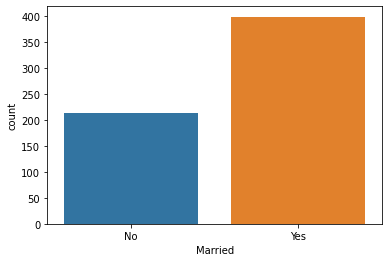

In [10]:
sns.countplot(LPP['Married'])

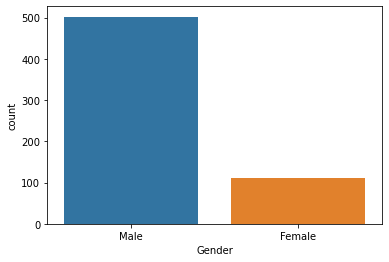

In [11]:
sns.countplot(LPP['Gender'])

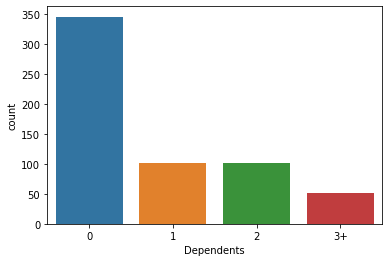

In [12]:
sns.countplot(LPP['Dependents'])

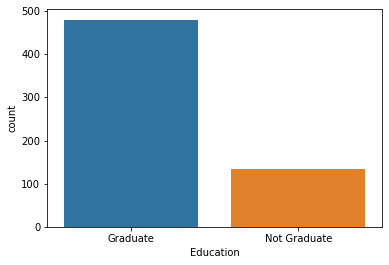

In [13]:
sns.countplot(LPP['Education'])

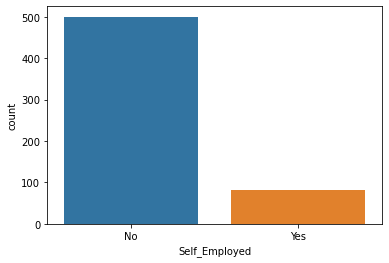

In [15]:
sns.countplot(LPP['Self_Employed'])

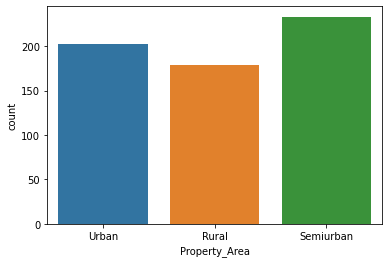

In [16]:
sns.countplot(LPP['Property_Area'])

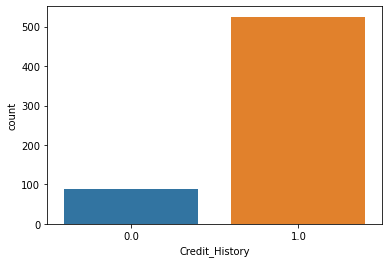

In [23]:
sns.countplot(LPP['Credit_History'])

# Missing Values Imputation

In [7]:
LPP.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
LPP['Gender'].fillna('Male',inplace=True)

In [17]:
LPP['Married'].fillna('Yes',inplace=True)

In [18]:
LPP['Dependents'].fillna('0',inplace=True)

In [19]:
LPP['Self_Employed'].fillna('No',inplace=True)

In [20]:
LPP['LoanAmount'].fillna(LPP['LoanAmount'].mean(),inplace=True)

In [21]:
LPP['Loan_Amount_Term'].fillna(360,inplace=True)

In [22]:
LPP['Credit_History'].fillna(1.0,inplace=True)

# Bivariate of Categorical features

In [11]:
LPP.groupby(['Loan_Status','Gender'])['Loan_ID'].count().reset_index()

,Loan_Status,Gender,Loan_ID
0,N,Female,37
1,N,Male,150
2,Y,Female,75
3,Y,Male,339


In [12]:
LPP.groupby(['Loan_Status','Married'])['Loan_ID'].count().reset_index()

,Loan_Status,Married,Loan_ID
0,N,No,79
1,N,Yes,113
2,Y,No,134
3,Y,Yes,285


In [13]:
LPP.groupby(['Loan_Status','Dependents'])['Loan_ID'].count().reset_index()

,Loan_Status,Dependents,Loan_ID
0,N,0,107
1,N,1,36
2,N,2,25
3,N,3+,18
4,Y,0,238
5,Y,1,66
6,Y,2,76
7,Y,3+,33


In [14]:
LPP.groupby(['Loan_Status','Education'])['Loan_ID'].count().reset_index()

,Loan_Status,Education,Loan_ID
0,N,Graduate,140
1,N,Not Graduate,52
2,Y,Graduate,340
3,Y,Not Graduate,82


In [15]:
LPP.groupby(['Loan_Status','Self_Employed'])['Loan_ID'].count().reset_index()

,Loan_Status,Self_Employed,Loan_ID
0,N,No,157
1,N,Yes,26
2,Y,No,343
3,Y,Yes,56


In [16]:
LPP.groupby(['Loan_Status','Property_Area'])['Loan_ID'].count().reset_index()

,Loan_Status,Property_Area,Loan_ID
0,N,Rural,69
1,N,Semiurban,54
2,N,Urban,69
3,Y,Rural,110
4,Y,Semiurban,179
5,Y,Urban,133


# Outlier Detection Using boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x19b019e1668>,
 'caps': [<matplotlib.lines.Line2D at 0x19b01a12908>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b01a05f28>],
 'medians': [<matplotlib.lines.Line2D at 0x19b01a1c048>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b01a1c3c8>],
 'means': []}

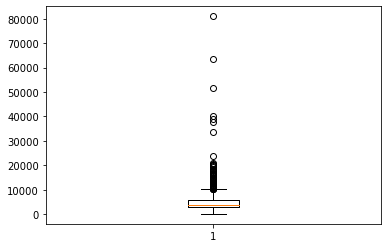

In [26]:
plt.boxplot(LPP['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19b01a72898>,
 'caps': [<matplotlib.lines.Line2D at 0x19b01a72f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b01a72588>],
 'medians': [<matplotlib.lines.Line2D at 0x19b01a806d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b01a80a58>],
 'means': []}

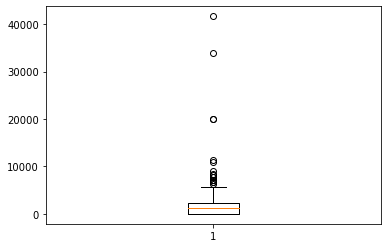

In [27]:
plt.boxplot(LPP['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19b01ad47f0>,
 'caps': [<matplotlib.lines.Line2D at 0x19b01ad4ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b01ad44e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19b01ae1630>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b01ae19b0>],
 'means': []}

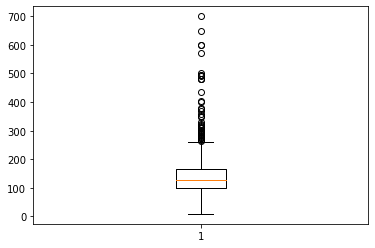

In [28]:
plt.boxplot(LPP['LoanAmount'])

# Splitting data with loan_status YES and NO

In [31]:
LPP1=LPP[LPP['Loan_Status']=='Y']
LPP1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


In [32]:
LPP2=LPP[LPP['Loan_Status']=='N']
LPP2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.000000,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.000000,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.000000,360.0,1.0,Rural,N
597,LP002943,Male,No,0,Graduate,No,2987,0.0,88.000000,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.000000,180.0,1.0,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,146.412162,180.0,1.0,Urban,N


# Correlation

In [34]:
LPP.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


# Converting Variables for Modelling

In [37]:
LPP_d=pd.get_dummies(LPP,columns=['Dependents','Property_Area'], drop_first=True)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [41]:
LPP_d.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Y,0,0,0,0,1
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,N,1,0,0,0,0
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Y,0,0,0,0,1
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Y,0,0,0,0,1
4,LP001008,Male,No,Graduate,No,6000,0.0,141.000000,360.0,1.0,Y,0,0,0,0,1


In [50]:
for i in LPP_d.columns:
    if (LPP_d[i].dtypes=='object')&(i!='Loan_ID'):
        LPP_d[i]=le.fit_transform(LPP_d[i])

In [51]:
LPP_d=LPP_d.drop(['Loan_ID'],axis=1)

In [52]:
LPP_d.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1


# Modelling- Logistic Regression

In [53]:
X=LPP_d.drop(['Loan_Status'],axis=1)

In [54]:
Y=LPP_d['Loan_Status']

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [56]:
lo_reg=LogisticRegression()

In [57]:
Y_test.shape

(185,)

In [58]:
lo_reg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [59]:
#cross validation
kfold=KFold(n_splits=5,random_state=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [60]:
pred_train_kfold=cross_val_predict(lo_reg,X_train,Y_train,cv=kfold)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
#prediction on train
pred_train=lo_reg.predict(X_train)

In [62]:
pred_proba_train=lo_reg.predict_proba(X_train)[:,1]

In [63]:
print(confusion_matrix(Y_train,pred_train))
print(accuracy_score(Y_train,pred_train))
print(recall_score(Y_train,pred_train))
print(precision_score(Y_train,pred_train))
print(f1_score(Y_train,pred_train))

[[ 62  69]
 [  6 292]]
0.8251748251748252
0.9798657718120806
0.8088642659279779
0.8861911987860396


In [64]:
fpr,tpr,thr=roc_curve(Y_train,pred_proba_train,drop_intermediate=False)

In [65]:
roc_auc_score(Y_train,pred_proba_train)

0.7876171935037655

In [66]:
#prediction on test
pred_test=lo_reg.predict(X_test)

In [67]:
pred_proba_test=lo_reg.predict_proba(X_test)[:,1]

In [68]:
print(confusion_matrix(Y_test,pred_test))
print(accuracy_score(Y_test,pred_test))
print(recall_score(Y_test,pred_test))
print(precision_score(Y_test,pred_test))
print(f1_score(Y_test,pred_test))

[[ 22  39]
 [  6 118]]
0.7567567567567568
0.9516129032258065
0.7515923566878981
0.8398576512455517


In [69]:
fpr1,tpr1,thr1=roc_curve(Y_test,pred_proba_test,drop_intermediate=False)

In [56]:
print(thr1)

[0.94202286 0.91063471 0.90636724 0.89534318 0.89171537 0.88924701
 0.88883127 0.88782338 0.88603113 0.88597735 0.88449375 0.8783979
 0.87752853 0.87031489 0.86797758 0.86596006 0.86390694 0.86244048
 0.86146362 0.85823879 0.85774953 0.85674267 0.85466525 0.85435639
 0.85270221 0.84281253 0.84063009 0.83943416 0.83740688 0.83380525
 0.83292812 0.83282499 0.82956522 0.82701943 0.82691558 0.82278843
 0.82132024 0.81963928 0.81728904 0.81670913 0.81371349 0.81261799
 0.80758025 0.80604855 0.8046698  0.80296384 0.80184363 0.79617224
 0.79516742 0.79505784 0.79366297 0.7886169  0.78593156 0.78388251
 0.7808113  0.78051629 0.77720904 0.77596831 0.77482304 0.76942683
 0.76774579 0.76764599 0.76649062 0.76529716 0.7595106  0.75846645
 0.75802543 0.74678955 0.74546693 0.74060039 0.74011383 0.73926293
 0.73917961 0.73861872 0.73491675 0.73426262 0.73425003 0.72922543
 0.72247558 0.72102652 0.7179799  0.71063836 0.70555532 0.70479011
 0.70254692 0.69986914 0.69962704 0.69302652 0.6929072  0.69268

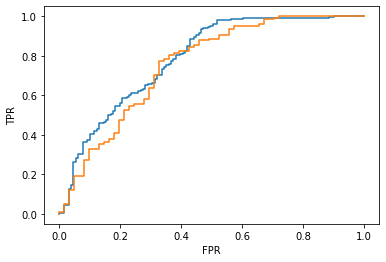

In [72]:
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [73]:
roc_auc_score(Y_test,pred_proba_test)

0.755156002115283

# Modelling- Decision Tree

In [74]:
Dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [75]:
Dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [76]:
#prediction on train
pred_train1=Dt.predict(X_train)

In [77]:
pred_proba_train1=Dt.predict_proba(X_train)[:,1]

In [78]:
print(confusion_matrix(Y_train,pred_train1))
print(accuracy_score(Y_train,pred_train1))
print(recall_score(Y_train,pred_train1))
print(precision_score(Y_train,pred_train1))
print(f1_score(Y_train,pred_train1))

[[ 64  67]
 [  3 295]]
0.8368298368298368
0.9899328859060402
0.8149171270718232
0.8939393939393939


In [79]:
FPR,TPR,THR=roc_curve(Y_train,pred_proba_train1)

In [80]:
roc_auc_score(Y_train,pred_proba_train1)

0.7972616425021773

In [81]:
#prediction on test
pred_test1=Dt.predict(X_test)

In [82]:
pred_proba_test1=Dt.predict_proba(X_test)[:,1]

In [83]:
print(confusion_matrix(Y_test,pred_test1))
print(accuracy_score(Y_test,pred_test1))
print(recall_score(Y_test,pred_test1))
print(precision_score(Y_test,pred_test1))
print(f1_score(Y_test,pred_test1))

[[ 22  39]
 [  3 121]]
0.772972972972973
0.9758064516129032
0.75625
0.852112676056338


In [84]:
FPR1,TPR1,THR1=roc_curve(Y_test,pred_proba_test1)

In [85]:
roc_auc_score(Y_test,pred_proba_test1)

0.6837652035959809

Text(0, 0.5, 'TPR')

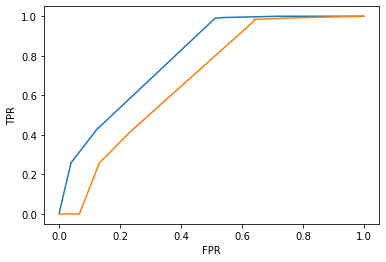

In [86]:
plt.plot(FPR,TPR)
plt.plot(FPR1,TPR1)
plt.xlabel('FPR')
plt.ylabel('TPR')

# Model- Random forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf=RandomForestClassifier()

In [89]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [25]:
# prediction on train
rf_pred_train=rf.predict(X_train)

In [26]:
print(confusion_matrix(Y_train,rf_pred_train))
print(accuracy_score(Y_train,rf_pred_train))
print(recall_score(Y_train,rf_pred_train))
print(precision_score(Y_train,rf_pred_train))
print(f1_score(Y_train,rf_pred_train))

[[153   0]
 [  0 338]]
1.0
1.0
1.0
1.0


In [28]:
# prediction on test
rf_pred_test=rf.predict(X_test)

In [29]:
print(confusion_matrix(Y_test,rf_pred_test))
print(accuracy_score(Y_test,rf_pred_test))
print(recall_score(Y_test,rf_pred_test))
print(precision_score(Y_test,rf_pred_test))
print(f1_score(Y_test,rf_pred_test))

[[18 21]
 [ 4 80]]
0.7967479674796748
0.9523809523809523
0.7920792079207921
0.8648648648648649


It seems like it is a overfitted model as there is significant percentage loss in accuracy, precision, f1 score in predicting test data compared to prection on training data.
So we will do hyperparameter tuning

# Hyperparameter tuning- Random Forest

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
params={'n_estimators':[75,100,125],
       'min_samples_leaf':[25,30],
       'max_depth':[4,5,6]}

In [33]:
rsv=RandomizedSearchCV(rf,params,n_iter=5)

In [34]:
rsv_rf=rsv.fit(X_train,Y_train)

In [35]:
rsv_rf.best_params_

{'n_estimators': 75, 'min_samples_leaf': 25, 'max_depth': 4}

In [36]:
rsv_rf.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=25, n_estimators=75)

In [37]:
rf_model=RandomForestClassifier(max_depth=4, min_samples_leaf=25, n_estimators=75)

In [38]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=25, n_estimators=75)

In [39]:
# prediction on train
rf_model_predict1=rf_model.predict(X_train)

In [44]:
rf_pred_proba1=rf_model.predict_proba(X_train)[:,1]

In [45]:
FPR,TPR,THR=roc_curve(Y_train,rf_pred_proba1)

In [52]:
roc_auc_score(Y_train,rf_pred_proba1)

0.8330336079204859

In [40]:
print(confusion_matrix(Y_train,rf_model_predict1))
print(accuracy_score(Y_train,rf_model_predict1))
print(recall_score(Y_train,rf_model_predict1))
print(precision_score(Y_train,rf_model_predict1))
print(f1_score(Y_train,rf_model_predict1))

[[ 60  93]
 [  5 333]]
0.8004073319755601
0.985207100591716
0.7816901408450704
0.8717277486910995


In [41]:
# prediction on test
rf_model_predict2=rf_model.predict(X_test)

In [46]:
rf_pred_proba2=rf_model.predict_proba(X_test)[:,1]

In [47]:
FPR1,TPR1,THR1=roc_curve(Y_test,rf_pred_proba2)

In [53]:
roc_auc_score(Y_test,rf_pred_proba2)

0.8000610500610501

In [42]:
print(confusion_matrix(Y_test,rf_model_predict2))
print(accuracy_score(Y_test,rf_model_predict2))
print(recall_score(Y_test,rf_model_predict2))
print(precision_score(Y_test,rf_model_predict2))
print(f1_score(Y_test,rf_model_predict2))

[[12 27]
 [ 1 83]]
0.7723577235772358
0.9880952380952381
0.7545454545454545
0.8556701030927836


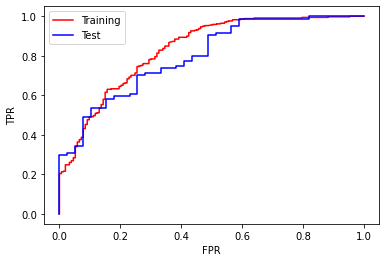

In [55]:
plt.plot(FPR,TPR,c='red',label='Training')
plt.plot(FPR1,TPR1,c='blue',label='Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# Feature Importance

In [92]:
feat_imp=[(feature,imp) for feature,imp in zip(X,rf.feature_importances_)]
df=pd.DataFrame(feat_imp,columns=['feature','importance']).sort_values('importance',ascending=False)
df

,feature,importance
8,Credit_History,0.256374
4,ApplicantIncome,0.198358
6,LoanAmount,0.185119
5,CoapplicantIncome,0.119389
7,Loan_Amount_Term,0.048410
12,Property_Area_Semiurban,0.030122
1,Married,0.026174
2,Education,0.025305
9,Dependents_1,0.020450
13,Property_Area_Urban,0.019858


From above we can conclude that Credit history, applicant Income , Loan Amount and Coapplicant Income are most Important Features predicting Loan

# Model- XGBoost

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb=XGBClassifier()

In [59]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
# Prediction on train
xgb_pred=xgb.predict(X_train)

In [61]:
print(confusion_matrix(Y_train,xgb_pred))
print(accuracy_score(Y_train,xgb_pred))
print(recall_score(Y_train,xgb_pred))
print(precision_score(Y_train,xgb_pred))
print(f1_score(Y_train,xgb_pred))

[[153   0]
 [  0 338]]
1.0
1.0
1.0
1.0


In [62]:
# Prediction on test
xgb_pred_test=xgb.predict(X_test)

In [63]:
print(confusion_matrix(Y_test,xgb_pred_test))
print(accuracy_score(Y_test,xgb_pred_test))
print(recall_score(Y_test,xgb_pred_test))
print(precision_score(Y_test,xgb_pred_test))
print(f1_score(Y_test,xgb_pred_test))

[[20 19]
 [ 9 75]]
0.7723577235772358
0.8928571428571429
0.7978723404255319
0.8426966292134832


It seems like it is a overfitted model as there is significant percentage loss in accuracy, precision, f1 score in predicting test data compared to prection on training data.
So we will do hyperparameter tuning

# Hyperparameter tuning- XGBoost

In [64]:
parameters={'learning_rate':[0.05,0.075,0.1],
       'max_depth':[4,5,6],
       'colsample_bytree':[0.7,0.8],
       'n_estimators':[75,100,125],
        'colsample_bylevel':[0.7,0.8]
       }

In [65]:
rsv1=RandomizedSearchCV(xgb,parameters,cv=5)

In [67]:
rsv_xg=rsv1.fit(X_train,Y_train)

In [69]:
rsv_xg.best_params_

{'n_estimators': 75,
 'max_depth': 5,
 'learning_rate': 0.075,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.7}

In [70]:
rsv_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.075, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
XGB=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.075, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.075, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
# Prediction on train
xg_pred=XGB.predict(X_train)

In [96]:
xg_pred_proba=XGB.predict_proba(X_train)[:,1]

In [107]:
fpr,tpr,thr=roc_curve(Y_train,xg_pred_proba)

In [97]:
print(confusion_matrix(Y_train,xg_pred))
print(accuracy_score(Y_train,xg_pred))
print(recall_score(Y_train,xg_pred))
print(precision_score(Y_train,xg_pred))
print(f1_score(Y_train,xg_pred))

[[ 72  81]
 [  7 331]]
0.8207739307535642
0.9792899408284024
0.8033980582524272
0.8826666666666666


In [98]:
# Prediction on test
xg_pred1=XGB.predict(X_test)

In [102]:
xg_pred1_proba=XGB.predict_proba(X_test)[:,1]

In [105]:
fpr1,tpr1,thr1=roc_curve(Y_test,xg_pred1_proba)

In [99]:
print(confusion_matrix(Y_test,xg_pred1))
print(accuracy_score(Y_test,xg_pred1))
print(recall_score(Y_test,xg_pred1))
print(precision_score(Y_test,xg_pred1))
print(f1_score(Y_test,xg_pred1))

[[16 23]
 [ 2 82]]
0.7967479674796748
0.9761904761904762
0.780952380952381
0.8677248677248677


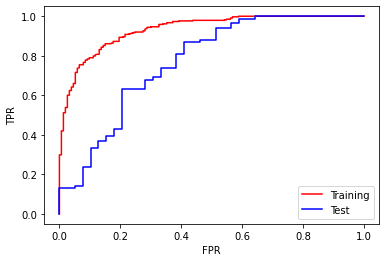

In [108]:
plt.plot(fpr,tpr,c='red',label='Training')
plt.plot(fpr1,tpr1,c='blue',label='Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()